In [49]:
import pandas as pd
import numpy as np
import re
import sklearn
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [50]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

PassengerId = test.PassengerId
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


IndexError: too many indices for array

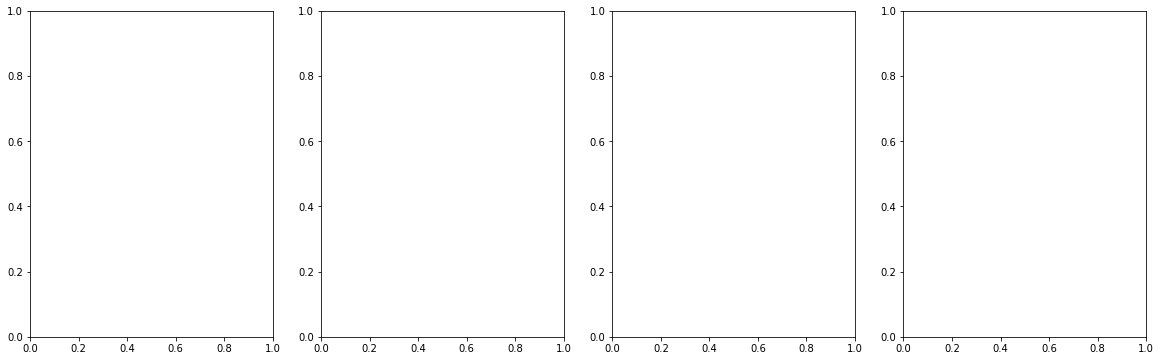

In [51]:
f, ax = plt.subplots(1, 4, figsize=(20, 6))
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[0, 0])
#ax[0, 0].set_title('Total psngrs by class')
sns.countplot('Sex', data=train, ax=ax[0, 1])
#ax[0, 1].set_title('Total psngrs by Gender')
sns.boxplot(x='Pclass', y='Age', data=train, ax=ax[0, 2])
sns.distplot(train[train['Survived'] == 0]['Age'].dropna(), ax=ax[0, 3], kde=False, color='r', bins=5)
sns.distplot(train[train['Survived'] == 1]['Age'].dropna(), ax=ax[0, 3], kde=False, color='g', bins=5)

In [55]:
from collections import Counter


def detect_outliers(df, n, features):
    outlier_indices = []
    # walk over features
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers


outliers = detect_outliers(train, 2, ["Age", "Fare", "Parch", "SibSp"])
train.loc[outliers]
train = train.drop(outliers, axis=0).reset_index(drop=True)

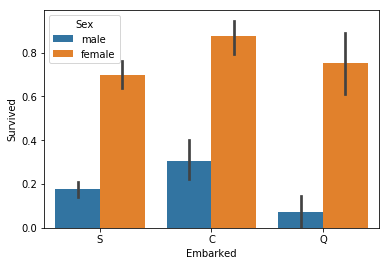

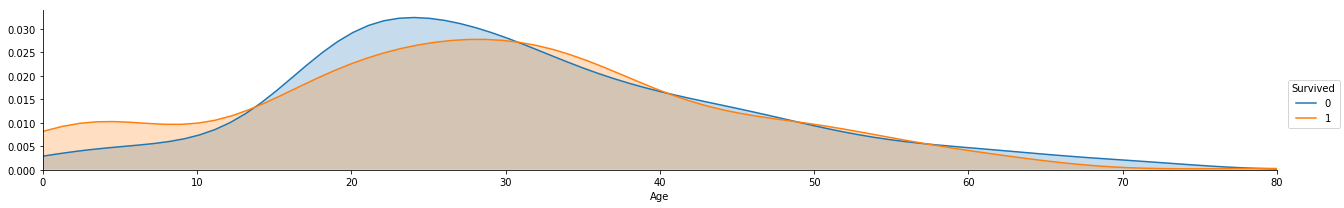

In [62]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train)
a = sns.FacetGrid(train, hue="Survived", aspect=6)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, train['Age'].max()))
a.add_legend()